# <span style="color:blue">Esercitazione 10</span>

### Esercizio 10.1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [2]:
loc=('square','circ'); ncit=('32','100')
dist=[0,0]; path=[0,0]   #1st is square, 2nd circ
prog=[0,0]               #progressive total length evolution

theta=np.linspace(0,2.*3.141593,num=200)    #for circ graphs
sinn=np.sin(theta); coss=np.cos(theta)
title=('Square','Circumference')

In [3]:
def path_fig(ifstart):
    pl.figure(figsize=(9,4))
    for i in range(2):
        pl.subplot(1,2,i+1)
        if i==1: pl.plot(coss,sinn,color='k',linewidth=0.4)
        pl.plot(path[i]['x'],path[i]['y'],marker='*',linewidth=1)
        pl.plot(path[i]['x'][0],path[i]['y'][0],marker='*',color='r')
        pl.xlabel('$x$')
        if i==0: pl.ylabel('$y$',labelpad=15)
        pl.xlim(-1.05,1.05)
        pl.ylim(-1.05,1.05)
        pl.title(title[i])
    if ifstart: tit="Starting"
    else: tit="Final"
    pl.suptitle(tit+" 1-st chromosome's path",y=1.02)
    pl.show()
    
    print(tit+' total distance:')
    for i in range(2): print('  '+loc[i]+': \t', dist[i])

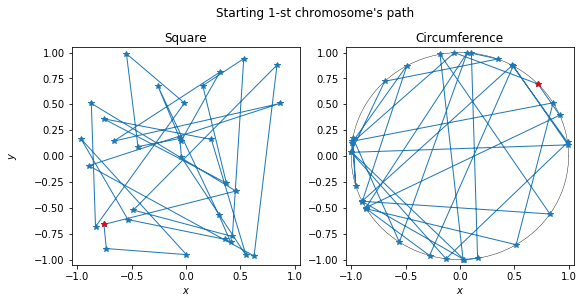

Starting total distance:
  square: 	 33.7649
  circ: 	 40.8131


In [4]:
for i in range(2):
    dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.32.SA.start',max_rows=1)
    path[i]=np.genfromtxt('results/cities.'+loc[i]+'.32.SA.start',skip_header=1,names='x,y')

path_fig(True)

In [5]:
best=[0,0]; index=[0,0]
def SA_fig(xlim,ylim):
    for i in range(2):
        fig,ax=pl.subplots(figsize=(12,5))
        pl.plot(prog[i]['gen'],prog[i]['best'],marker='.',markersize=0.2,linestyle='')
        best[i]=min(prog[i]['best']); index[i]=np.argmin(prog[i]['best'])
        pl.axhline(y=best[i],color='k',linestyle='dashed',linewidth=0.8)
        pl.grid(True)
        pl.xlabel('$N_{stp}')
        pl.ylabel("path's lenght",labelpad=15)
        pl.title("Path's lenght evolution ("+loc[i]+" case)")

        axins=inset_axes(ax,5.6,2.8,loc=1)
        axins.plot(prog[i]['gen'],prog[i]['best'],marker='.',markersize=2,linestyle='')
        axins.axhline(y=best[i],color='k',linestyle='dashed',linewidth=0.8)
        axins.set_xlim(xlim[i])
        axins.set_ylim(ylim[i])
        pl.grid(True)
        pl.yticks(visible=True)
        pl.xticks(visible=True)
        mark_inset(ax,axins,loc1=3,loc2=4,fc='none',ec='0.6')

        pl.show()
        
    print('best total distance:')
    for i in range(2): print('  '+loc[i]+': \t',best[i], '  with',index[i],'steps')

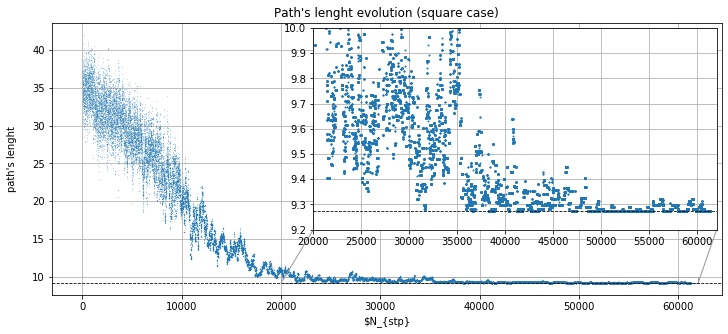

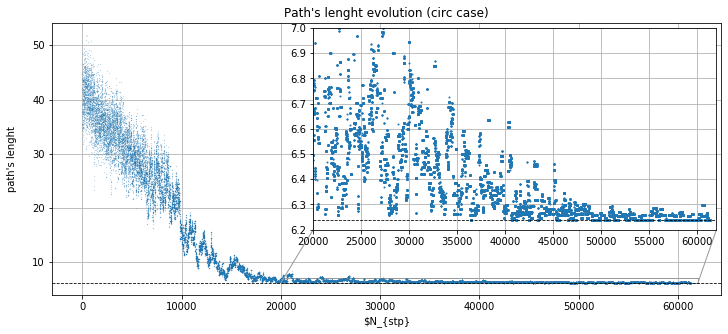

best total distance:
  square: 	 9.27331   with 36565 steps
  circ: 	 6.2403   with 36426 steps


In [6]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.32.SA.lenght',names='gen,best')

SA_fig(((2e4,6.2e4),(2e4,6.2e4)),((9.2,10),(6.2,7)))

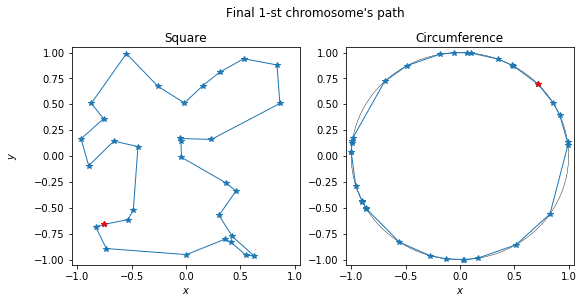

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


In [7]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32.SA.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.32.SA.best',skip_header=1,names='x,y')

path_fig(False)

#### Appendice

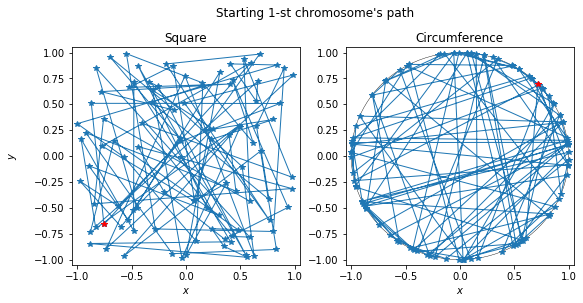

Starting total distance:
  square: 	 107.912
  circ: 	 121.07


In [8]:
for i in range(2):
    dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.100.SA.start',max_rows=1)
    path[i]=np.genfromtxt('results/cities.'+loc[i]+'.100.SA.start',skip_header=1,names='x,y')

path_fig(True)

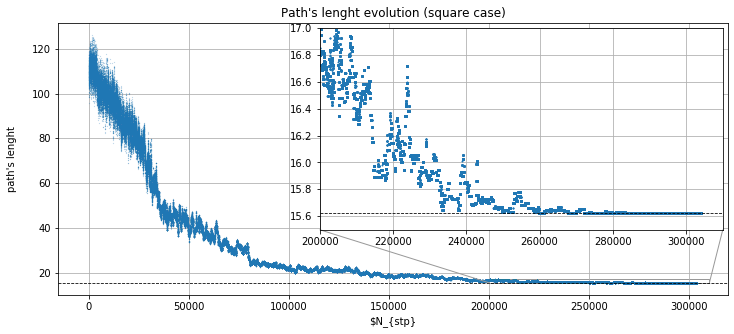

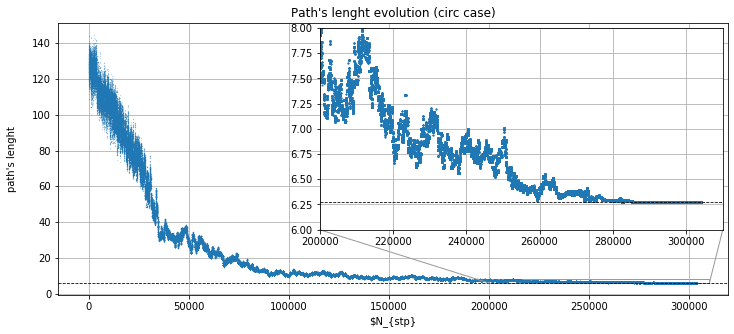

best total distance:
  square: 	 15.6211   with 276314 steps
  circ: 	 6.27735   with 286077 steps


In [9]:
for i in range(2): prog[i]=np.genfromtxt('results/path.'+loc[i]+'.100.SA.lenght',names='gen,best')

SA_fig(((2e5,3.1e5),(2e5,3.1e5)),((15.5,17),(6,8)))

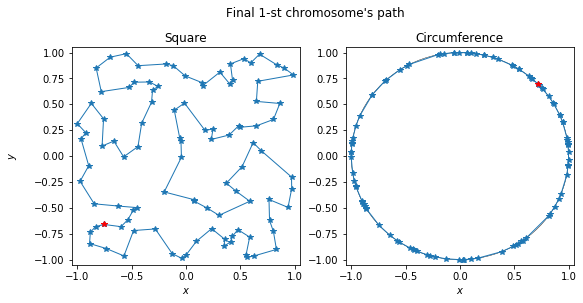

Final total distance:
  square: 	 15.6211
  circ: 	 6.27735


In [10]:
for i in range(2):
    dist[i]=np.genfromtxt('results/path.'+loc[i]+'.100.SA.best',max_rows=1)
    path[i]=np.genfromtxt('results/path.'+loc[i]+'.100.SA.best',skip_header=1,names='x,y')

path_fig(False)

**dal vecchio notebook09**:\
*Il cammino sulla medisima circonferenza è più lungo (qui nel caso a 100 città rispetto quello a 32). Ciò era atteso, in quanto più città deve comportare una maggior aderenza del cammino alla circonferenza stessa.*

### Esercizio 10.2

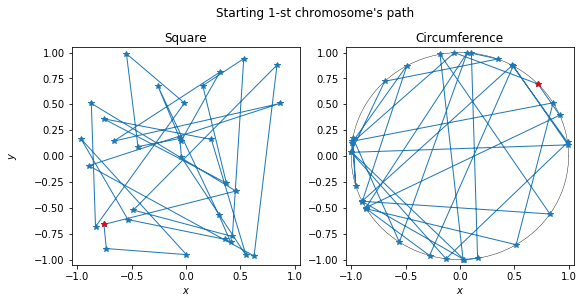

Starting total distance:
  square: 	 33.7649
  circ: 	 40.8131


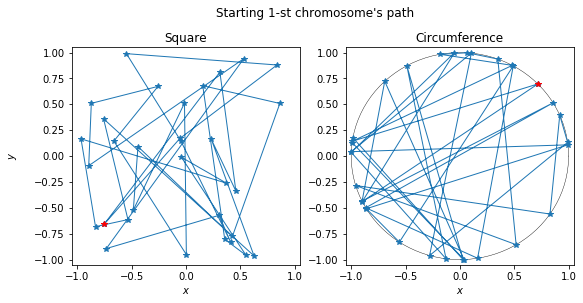

Starting total distance:
  square: 	 34.2832
  circ: 	 45.976


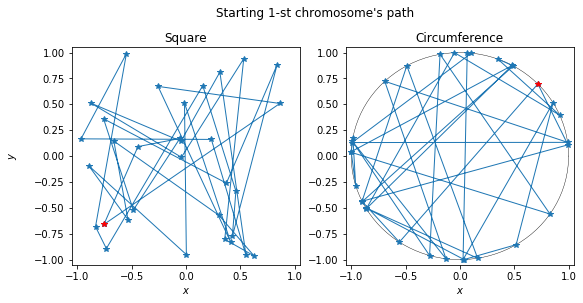

Starting total distance:
  square: 	 35.2928
  circ: 	 41.9892


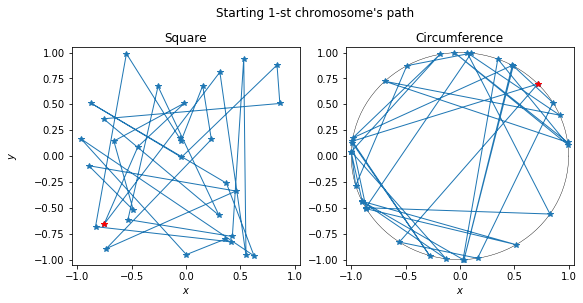

Starting total distance:
  square: 	 35.1963
  circ: 	 42.1848


In [11]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.32_'+str(icore)+'.start',max_rows=1)
        path[i]=np.genfromtxt('results/cities.'+loc[i]+'.32_'+str(icore)+'.start',skip_header=1,names='x,y')

    path_fig(True)

In [12]:
prog=[0 for icore in range(4)]
def evolution(ncit,loc,ylim):     #loc could be 'square' or 'circ'
    very_min,very_gen=100.,1e10   #min and index over all cores

    for icore in range(4):
        namefile='results/path.'+loc+'.'+str(ncit)+'_'+str(icore)+'.lenght'
        prog[icore]=np.genfromtxt(namefile,names='gen,best,mean')
        best=min(prog[icore]['best']); index=np.argmin(prog[icore]['best'])
        if(best<=very_min):
            if(index<very_gen): very_min=best; very_gen=index; core_index=icore

    pl.figure(figsize=(12,8))
    for icore in range(4):
        pl.subplot(2,2,icore+1)
        pl.plot(prog[icore]['gen'],prog[icore]['mean'],marker='.',linestyle='',label='1st half')
        pl.plot(prog[icore]['gen'],prog[icore]['best'],marker='.',linestyle='',label='best')
        pl.axhline(y=very_min,color='k',linestyle='dashed',linewidth=0.8)
        pl.legend(loc='best')
        pl.grid(True)
        pl.ylim(ylim)
        pl.xlabel('$N_{gen}$')
        pl.ylabel("path's lenght",labelpad=15)
        pl.title(str(icore+1)+'th continent')
    pl.suptitle("Final 1-st chromosome's path, "+loc+" case")
    pl.show()
    
    print('best total distance in '+str(core_index+1)+'-th continent:')
    print('  '+loc+': \t',very_min,'\t with',very_gen,'generations')

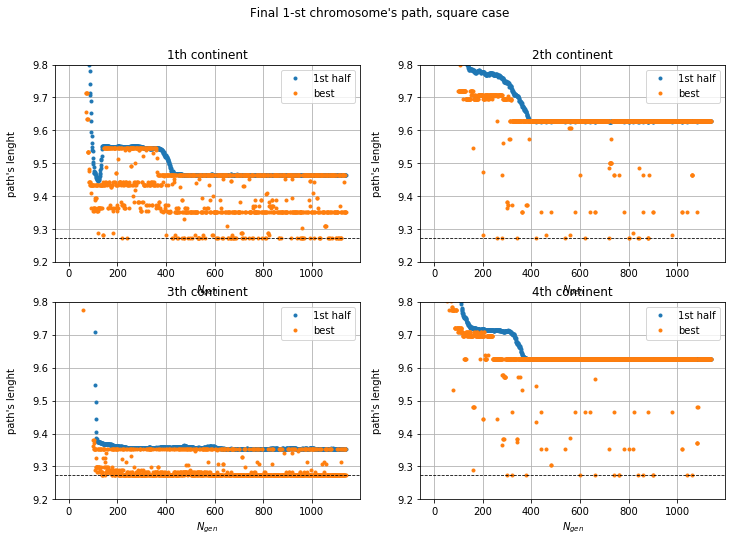

best total distance in 3-th continent:
  square: 	 9.27331 	 with 135 generations


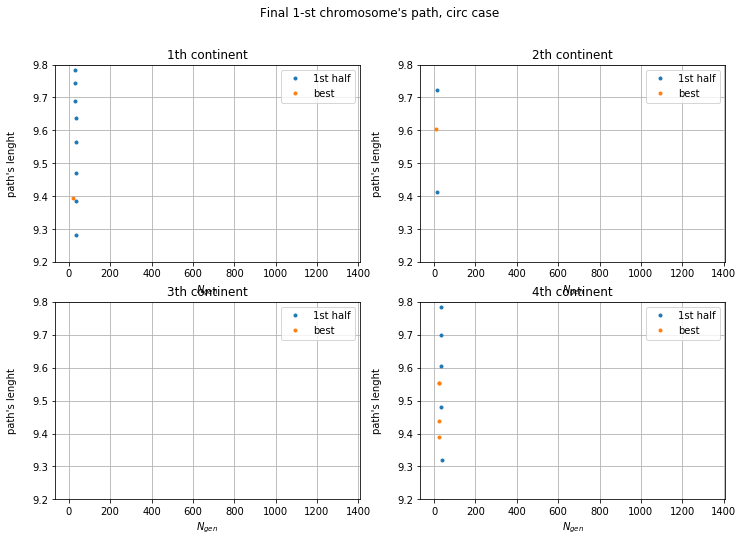

best total distance in 3-th continent:
  circ: 	 6.2403 	 with 207 generations


In [13]:
evolution(32,'square',(9.2,9.8))
evolution(32,'circ',(9.2,9.8))

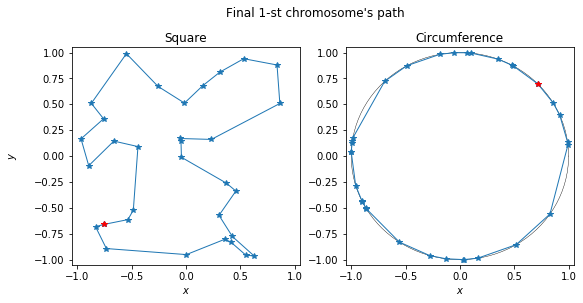

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


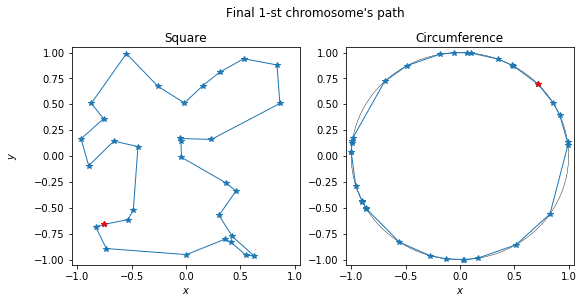

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


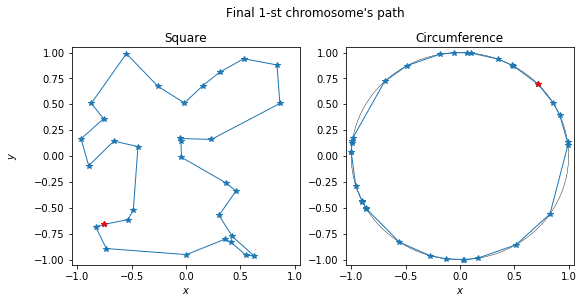

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


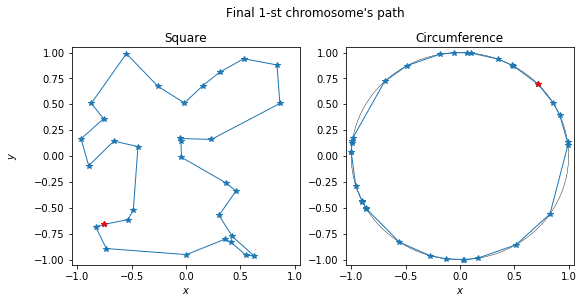

Final total distance:
  square: 	 9.27331
  circ: 	 6.2403


In [14]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/path.'+loc[i]+'.32_'+str(icore)+'.best',max_rows=1)
        path[i]=np.genfromtxt('results/path.'+loc[i]+'.32_'+str(icore)+'.best',skip_header=1,names='x,y')

    path_fig(False)

#### Appendice

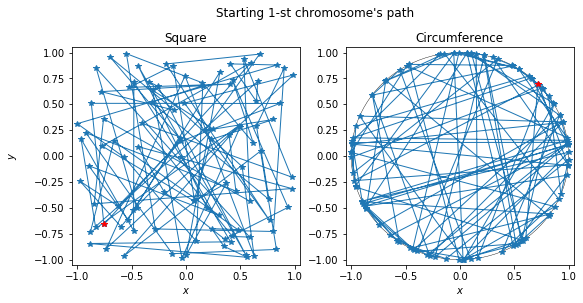

Starting total distance:
  square: 	 107.912
  circ: 	 121.07


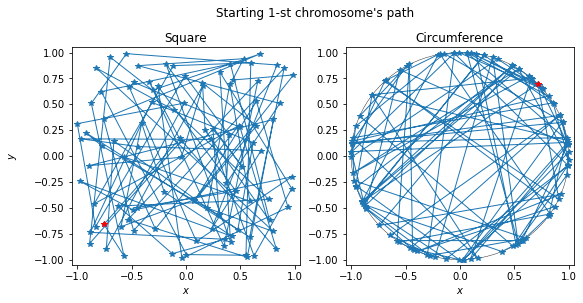

Starting total distance:
  square: 	 113.031
  circ: 	 119.5


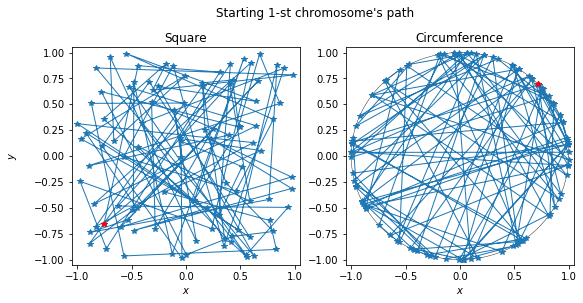

Starting total distance:
  square: 	 118.537
  circ: 	 135.087


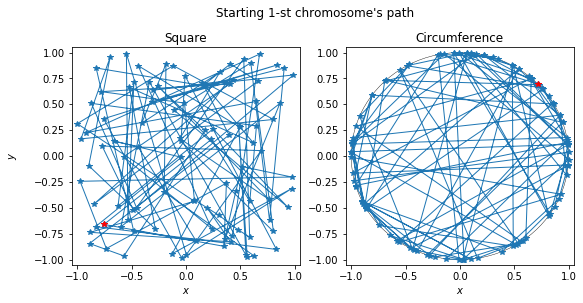

Starting total distance:
  square: 	 112.173
  circ: 	 111.784


In [15]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/cities.'+loc[i]+'.100_'+str(icore)+'.start',max_rows=1)
        path[i]=np.genfromtxt('results/cities.'+loc[i]+'.100_'+str(icore)+'.start',skip_header=1,names='x,y')

    path_fig(True)

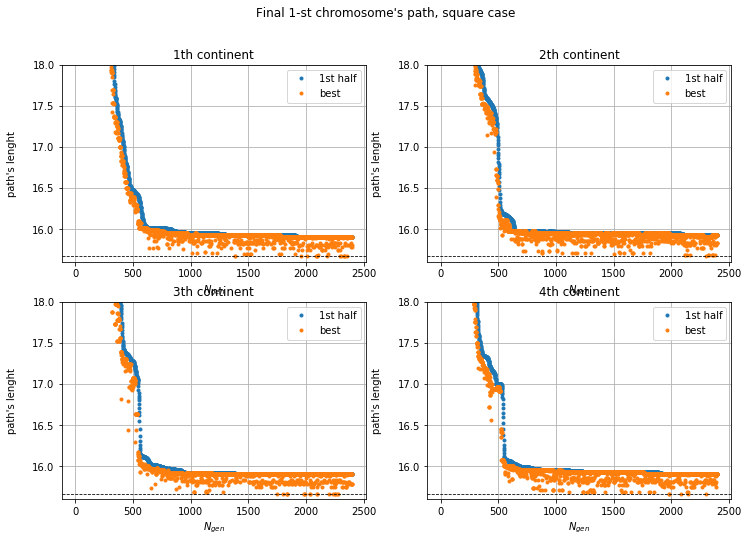

best total distance in 1-th continent:
  square: 	 15.6695 	 with 1379 generations


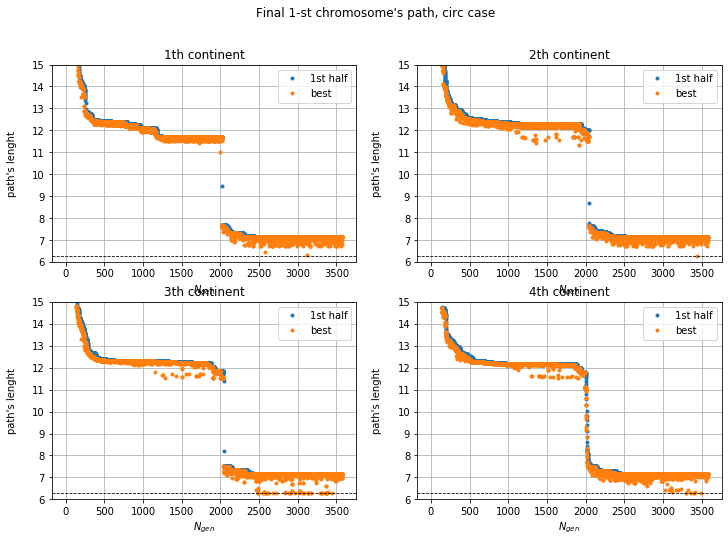

best total distance in 3-th continent:
  circ: 	 6.28637 	 with 2571 generations


In [16]:
evolution(100,'square',(15.6,18))
evolution(100,'circ',(6,15))

*pattern particolare, meglio fare $N_{max}=2000$ (il problema nasce dal fatto che le città sono molto vicine e quindi la differenza tra le varie lunghezze dei cammini può essere molto piccola; il migliore percorso viene perso facilmente)*

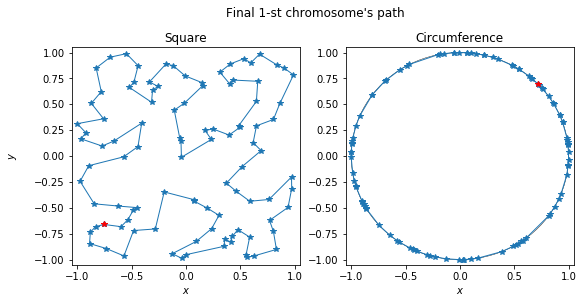

Final total distance:
  square: 	 15.6695
  circ: 	 6.33943


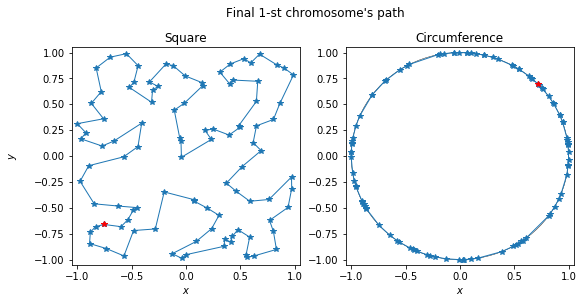

Final total distance:
  square: 	 15.6695
  circ: 	 6.28742


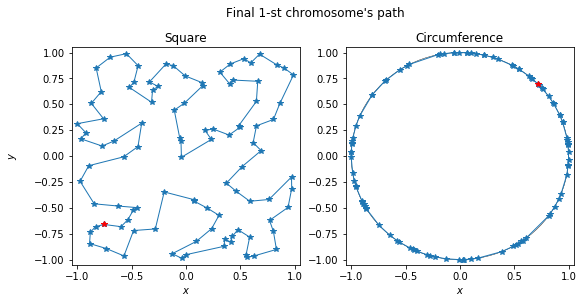

Final total distance:
  square: 	 15.6695
  circ: 	 6.28637


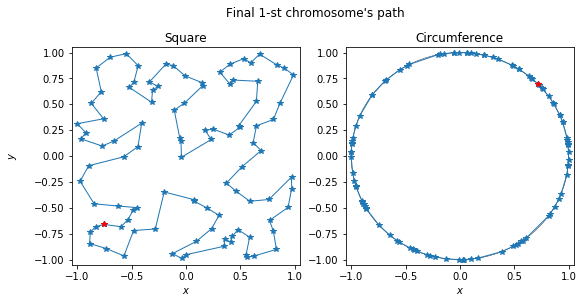

Final total distance:
  square: 	 15.6695
  circ: 	 6.28839


In [17]:
for icore in range(4):
    for i in range(2):
        dist[i]=np.genfromtxt('results/path.'+loc[i]+'.100_'+str(icore)+'.best',max_rows=1)
        path[i]=np.genfromtxt('results/path.'+loc[i]+'.100_'+str(icore)+'.best',skip_header=1,names='x,y')

    path_fig(False)